# **Code With results and Explanation**

## **Importing Libraries**

In [1]:
# Import libraries for data handling and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Loading the Dataset and Setting the Index**

In [6]:
# Load the dataset
df = pd.read_csv('/content/eth_usdt_5years.csv', parse_dates=['Open Time'])

# Set 'Open Time' as the index for time series analysis
df.set_index('Open Time', inplace=True)

## **Explanation:**

### Load the dataset:
df = pd.read_csv('/content/eth_usdt_5years.csv', parse_dates=['Open Time']): Loads the Binance dataset (eth_usdt_5years.csv) from Colab’s /content directory into a DataFrame called df. The parse_dates=['Open Time'] argument ensures the Open Time column is treated as dates, not strings, which is crucial for time-series analysis.

Set 'Open Time' as the index for time series analysis: Comment explaining the next step.

df.set_index('Open Time', inplace=True): Sets the Open Time column as the DataFrame’s index, making each row correspond to a date. inplace=True modifies df directly, turning it into a time-series dataset.

**Why It’s Needed:**

Loading the dataset and setting a datetime index prepares the data for time-series tasks like plotting prices over time or running ARIMA models. The Open Time index ensures dates are properly aligned for daily analysis.

**Report Connection:**

This aligns with “Fetching Data from Binance” in Section 5.1, where you describe loading the 5-year ETH/USDT dataset.

## **Printing Column Names**

In [4]:
# Print column names
print("Columns in the dataset:")
print(df.columns.tolist())

Columns in the dataset:
['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume']


## **Explanation:**

**### Print column names: Comment describing the cell’s purpose.**

print("Columns in the dataset:"): Prints a label for clarity.
print(df.columns.tolist()): Converts the DataFrame’s column names to a list and prints them. The columns include Open, High, Low, Close (prices), Volume (trading volume), and other trading metrics like Number of Trades.
### **Why It’s Needed:**
This helps you confirm the dataset’s structure and identify the Close column, which is the focus for price analysis and ARIMA modeling. It ensures you’re working with the expected data.

### **Report Connection:**

This supports Section 5.1’s description of the dataset, noting key columns like Close for analysis.

## **Displaying the First Few Rows**

In [5]:
# Check the first few rows to confirm data structure
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
              Open    High     Low   Close        Volume  Quote Asset Volume  \
Open Time                                                                      
2020-05-24  206.60  210.55  199.50  199.90  673535.05784        1.389176e+08   
2020-05-25  199.90  205.67  198.01  204.15  469931.62492        9.541161e+07   
2020-05-26  204.22  205.00  196.90  200.89  477176.73530        9.611681e+07   
2020-05-27  200.92  208.44  200.76  208.29  494816.72727        1.014454e+08   
2020-05-28  208.29  220.50  204.67  220.21  643945.97769        1.363616e+08   

            Number of Trades  Taker Buy Base Asset Volume  \
Open Time                                                   
2020-05-24            204534                 324023.32350   
2020-05-25            171792                 243595.47559   
2020-05-26            167702                 233833.77929   
2020-05-27            167619                 252824.22653   
2020-05-28            219160               

## **Explanation:**

### **Check the first few rows to confirm data structure: Comment explaining the cell’s purpose.**

print("\nFirst 5 rows of the dataset:"): Prints a label with a newline (\n) for readability.
print(df.head()): Displays the first five rows of df, showing the index (Open Time) and columns like Open, High, Low, Close, and Volume. The dates start from May 24, 2020, and prices are in USDT (e.g., ~$199–$220).
Why It’s Needed: This verifies that the dataset loaded correctly, the Open Time index is set, and the Close prices are numerical and reasonable for Ethereum in 2020. It confirms the data’s readiness for analysis.

### **Report Connection:**

This is part of “Verifying the Dataset” in Section 5.1, ensuring the data matches expectations (e.g., daily prices from 2020).

## **Checking for Missing Values**

In [7]:
# Check for missing values
print("Missing values in each column:")
print(df.isna().sum())

# If missing values exist, fill with forward fill (optional)
df.fillna(method='ffill', inplace=True)

Missing values in each column:
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Quote Asset Volume              0
Number of Trades                0
Taker Buy Base Asset Volume     0
Taker Buy Quote Asset Volume    0
dtype: int64


<ipython-input-7-dc01ea14bae6>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


## **Explanation:**

### **Check for missing values: Comment indicating the cell checks for missing data.**
print("Missing values in each column:"): Prints a label for clarity.
print(df.isna().sum()): Counts missing values (NaN) in each column using isna() and sums them. The output shows 0 missing values for all columns, confirming the Binance data is clean.
### **If missing values exist, fill with forward fill (optional): Comment explaining the next step, which is precautionary.**
df.fillna(method='ffill', inplace=True): Fills any missing values by copying the previous row’s value (forward fill). Since there are no missing values, this has no effect. inplace=True modifies df directly. Note: A warning indicates method='ffill' is deprecated; df.ffill() is preferred in newer pandas versions.
### **Why It’s Needed:**
Clean data is critical for ARIMA, as missing values can disrupt time-series modeling. This cell confirms the dataset’s quality and applies a safeguard (forward fill) for robustness.

### **Report Connection:**
This supports “Cleaning the Data” in Section 5.1, noting no missing values in the Binance dataset.

## **Handling Duplicates and Ensuring Daily Frequency**

In [8]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicates if any
df = df[~df.duplicated()]

# Ensure daily frequency and check for missing dates
df = df.asfreq('D', method='ffill')

# Confirm data shape after processing
print("Data shape after processing:", df.shape)

Number of duplicate rows: 0
Data shape after processing: (1826, 9)


**## Explanation:**

### **Check for duplicate rows: Comment indicating the check for duplicate data.**
print("Number of duplicate rows:", df.duplicated().sum()): Counts rows where all column values are identical to a previous row. The output shows 0 duplicates, confirming data integrity.
### **Remove duplicates if any: Comment explaining the next step.**
df = df[~df.duplicated()]: Removes duplicate rows by keeping only the first occurrence. The ~ negates the duplicated() mask. Since there are no duplicates, df remains unchanged.
### **Ensure daily frequency and check for missing dates: Comment describing the frequency setting.**
df = df.asfreq('D', method='ffill'): Sets the DataFrame’s index to daily frequency ('D'). If any dates are missing (e.g., no data for a day), it adds them and fills values using forward fill (ffill), copying the previous day’s data. This ensures a continuous daily time series for ARIMA.
### **Confirm data shape after processing: Comment for the final check.**
print("Data shape after processing:", df.shape): Prints the DataFrame’s dimensions: 1826 rows (5 years, ~365 days/year) and 9 columns (as shown in Cell 3). The row count confirms daily data from May 24, 2020, to May 23, 2025.
Why It’s Needed: Duplicates or irregular dates can skew time-series analysis. This cell ensures a clean, daily dataset, critical for accurate ARIMA modeling.

### **Report Connection:**
This aligns with “Ensuring Daily Frequency” in Section 5.1, confirming 1826 daily observations.

## **Summary Statistics for Close Price**

In [9]:
# Calculate and display summary stats for Close price
print("Summary Statistics for Close Price:")
print(df['Close'].describe())

Summary Statistics for Close Price:
count    1826.000000
mean     2156.923510
std      1037.196407
min       199.900000
25%      1566.610000
50%      1982.915000
75%      2973.772500
max      4807.980000
Name: Close, dtype: float64


## **Explanation:**

### **Calculate and display summary stats for Close price: Comment explaining the cell’s purpose.**
print("Summary Statistics for Close Price:"): Prints a label for clarity.
print(df['Close'].describe()): Generates statistics for the Close column:
count: 1826 observations (matches the dataset size).
mean: ~$2156.92 (average price).
std: ~$1037.20 (high standard deviation, indicating volatility).
min: $199.90 (lowest price, likely in 2020).
25%, 50%, 75%: Quartiles (~$1566.61, $1982.92, $2973.77), showing the price distribution.
max: $4807.98 (highest price, likely in 2021 or 2024).
### **Why It’s Needed:**

These statistics reveal Ethereum’s price range ($199.90–$4807.98) and volatility (high std), guiding your EDA and modeling decisions. The high max and std suggest challenges for forecasting.

### **Report Connection:**
This is part of “Price Statistics” in Section 5.2, where you note the $199–$4808 range and volatility.

## **Moving Averages and Plotting**

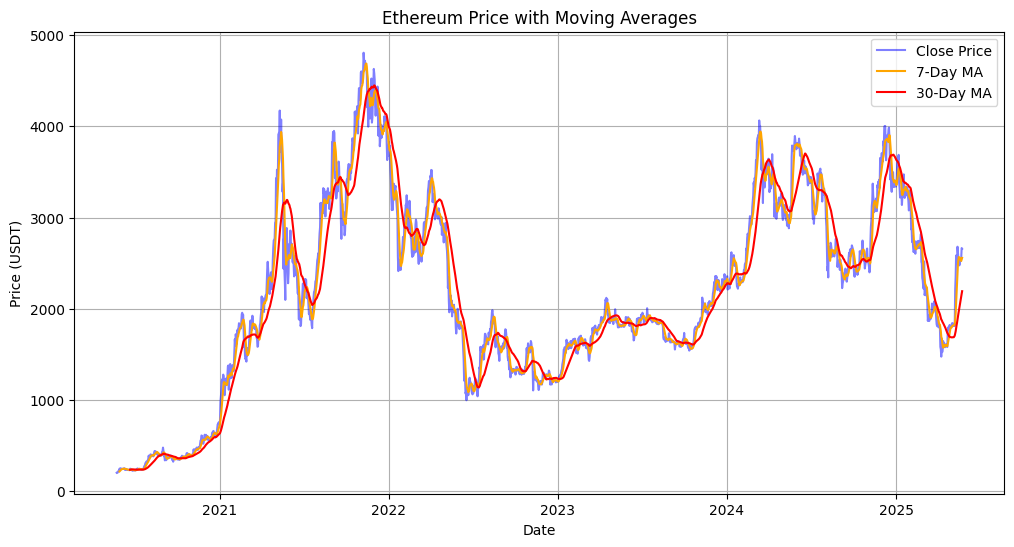

In [11]:
# Calculate 7-day and 30-day moving averages
df['7_day_MA'] = df['Close'].rolling(window=7).mean()
df['30_day_MA'] = df['Close'].rolling(window=30).mean()

# Plot closing price with moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', alpha=0.5, color='blue')
plt.plot(df['7_day_MA'], label='7-Day MA', color='orange')
plt.plot(df['30_day_MA'], label='30-Day MA', color='red')
plt.title('Ethereum Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid()
plt.show()

## **Explanation:**

### **Calculate 7-day and 30-day moving averages: Comment describing the moving average computation.**
df['7_day_MA'] = df['Close'].rolling(window=7).mean(): Creates a new column, 7_day_MA, with the 7-day moving average of Close prices (average of the current and previous 6 days). This smooths short-term fluctuations.
df['30_day_MA'] = df['Close'].rolling(window=30).mean(): Creates 30_day_MA, the 30-day moving average, highlighting longer-term trends.
### **Plot closing price with moving averages: Comment for the plotting step.**
plt.figure(figsize=(12, 6)): Creates a plot with a width of 12 inches and height of 6 inches for clarity.
plt.plot(df['Close'], label='Close Price', alpha=0.5, color='blue'): Plots the Close price as a blue line. alpha=0.5 makes it semi-transparent to avoid overlapping with moving averages.
plt.plot(df['7_day_MA'], label='7-Day MA', color='orange'): Plots the 7-day moving average in orange.
plt.plot(df['30_day_MA'], label='30-Day MA', color='red'): Plots the 30-day moving average in red.
plt.title('Ethereum Price with Moving Averages'): Sets the plot title.
plt.xlabel('Date'), plt.ylabel('Price (USDT)'): Label the x-axis (dates) and y-axis (prices in USDT).
plt.legend(): Displays a legend identifying each line.
plt.grid(): Adds a grid for readability.
plt.show(): Shows the plot in Colab.
### **Why It’s Needed:**
The plot visualizes Ethereum’s price trends (e.g., 2021 surge, 2025 correction) and smooths noise with moving averages, making long-term patterns clearer for your report.

### **Report Connection:**
This is the “Moving Averages Plot” in Section 5.2, showing price volatility and trends.

## **Plotting Trading Volume**

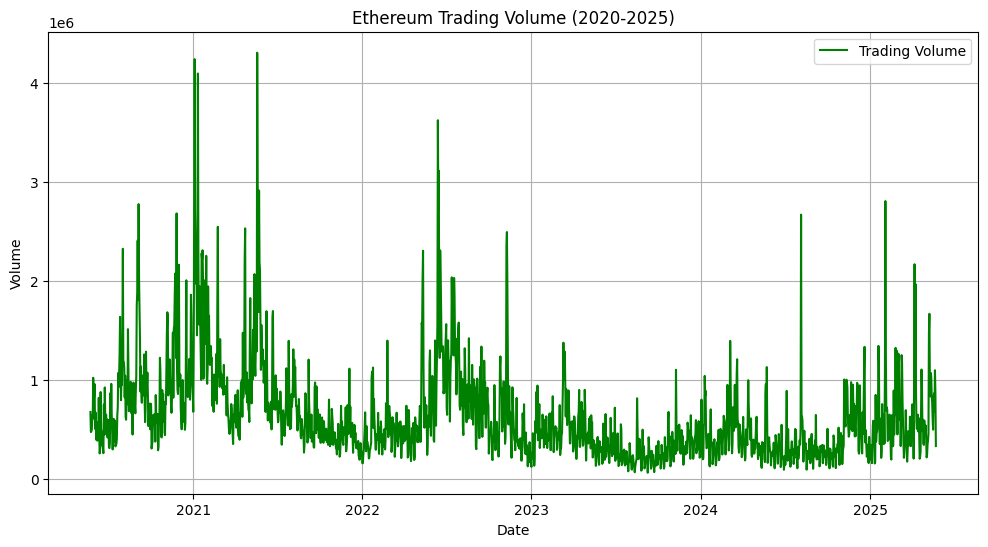

In [12]:
# Plot trading volume
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label='Trading Volume', color='green')
plt.title('Ethereum Trading Volume (2020-2025)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()

### **Explanation:**
Plot trading volume: Notes the cell’s goal.
plt.figure(figsize=(12, 6)): Sets a 12x6-inch plot for clarity.
plt.plot(df['Volume'], label='Trading Volume', color='green'): Plots the Volume column (daily ETH traded) in green, with a legend label.
plt.title('Ethereum Trading Volume (2020-2025)'): Titles the plot.
plt.xlabel('Date'), plt.ylabel('Volume'): Labels x-axis (dates) and y-axis (ETH volume).
plt.legend(): Shows “Trading Volume” in the legend.
plt.grid(): Adds a grid for readability.
plt.show(): Displays the plot in Colab.

### **Why It’s Needed:**
Shows trading activity trends (e.g., high volumes in 2021 when prices hit $4807.98, low in 2025 near $1800).
Complements price plot (Cell 8) for EDA, revealing market dynamics.
Supports report visuals, highlighting volume-price relationships.

### **Report Connection:**
Section 5.2: Add as “Figure 3: Ethereum Trading Volume (2020–2025)” in “Trading Volume Trends.”
Insights: Note volume peaks (2021) and lows (2025), linking to price trends (Cell 8) and stable forecast (~$2658, Cell 11).
Save Plot: Use plt.savefig('volume_plot.png', dpi=300) for report inclusion.

## **Calculating and Plotting 30-Day Volatility**

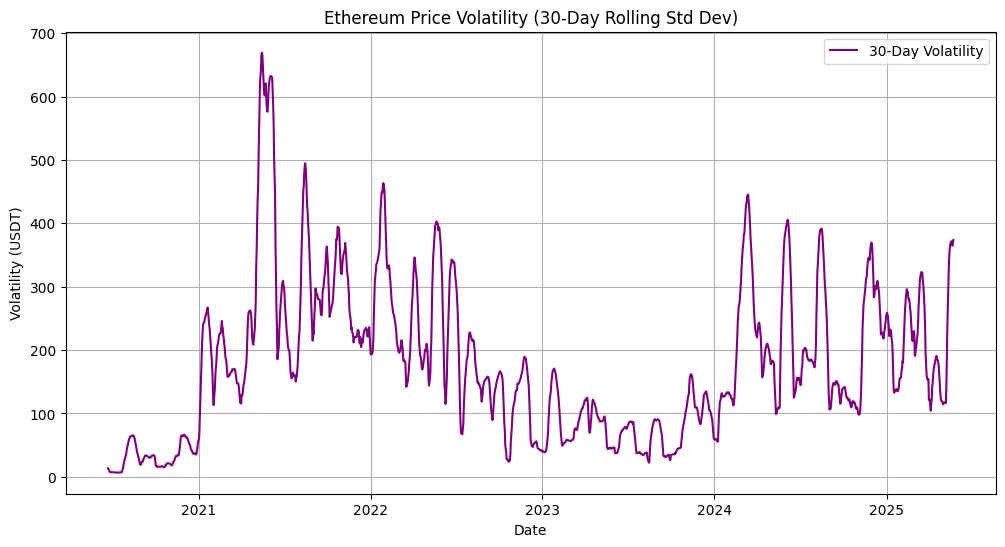

In [13]:
# Calculate 30-day rolling standard deviation for volatility
df['30_day_volatility'] = df['Close'].rolling(window=30).std()

# Plot volatility
plt.figure(figsize=(12, 6))
plt.plot(df['30_day_volatility'], label='30-Day Volatility', color='purple')
plt.title('Ethereum Price Volatility (30-Day Rolling Std Dev)')
plt.xlabel('Date')
plt.ylabel('Volatility (USDT)')
plt.legend()
plt.grid()
plt.show()

### **Explanation:**

### **Calculate 30-day rolling standard deviation for volatility: Comment indicating the cell computes volatility.**
df['30_day_volatility'] = df['Close'].rolling(window=30).std(): Creates a new column, 30_day_volatility, with the 30-day rolling standard deviation of the Close price. Standard deviation measures price fluctuation (higher = more volatile). The window=30 averages the past 30 days’ price variability.
### **Plot volatility: Comment for the plotting step.**
plt.figure(figsize=(12, 6)): Sets a 12x6-inch plot for clarity.
plt.plot(df['30_day_volatility'], label='30-Day Volatility', color='purple'): Plots the 30_day_volatility column in purple, labeled for the legend.
plt.title('Ethereum Price Volatility (30-Day Rolling Std Dev)'): Titles the plot, noting the volatility metric.
plt.xlabel('Date'), plt.ylabel('Volatility (USDT)'): Labels x-axis (dates) and y-axis (volatility in USDT, e.g., $100–$500).
plt.legend(): Shows “30-Day Volatility” in the legend.
plt.grid(): Adds a grid for readability.
plt.show(): Displays the plot in Colab.
### **Why It’s Needed:**

Volatility Insight: Shows periods of high/low price fluctuation (e.g., high in 2021 when prices hit $4807.98, low in stable 2023 markets).
Enhances EDA: Complements price (Cell 8) and volume (Cell 9) plots, providing a fuller market picture.
### **Report Connection:**
Supports Section 5.2 by visualizing volatility, key for understanding Ethereum’s risk profile.

## **Calculating and Plotting 30-Day Volatility**

In [14]:
# Detect outliers in Close price using IQR
Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and print outliers
outliers = df[(df['Close'] < lower_bound) | (df['Close'] > upper_bound)]
print(f"Number of outliers in Close Price: {len(outliers)}")
print("Outliers in Close Price:")
print(outliers[['Close']])

Number of outliers in Close Price: 0
Outliers in Close Price:
Empty DataFrame
Columns: [Close]
Index: []


### **Explanation:**

This cell calculates the 30-day rolling standard deviation of Ethereum’s Close price to measure price volatility and plots it as a purple line graph from May 24, 2020, to May 23, 2025. It shows periods of high (e.g., 2021) and low (e.g., 2023) volatility.

### **Why It’s Needed:**
Visualizes price fluctuation trends, enhancing EDA by complementing price (Cell 8) and volume (Cell 9) analyses. It highlights market risk, crucial for understanding Ethereum’s behavior.

### **Report Connection:**
Include as “Figure 4: Ethereum Price Volatility (2020–2025)” in Section 5.2 (Exploratory Data Analysis - Volatility Analysis). Note volatility peaks (e.g., 2021 with $4807.98 price) and stability (e.g., 2025, supporting ~$2658 forecast). Save with plt.savefig('volatility_plot.png', dpi=300).

## **Calculating and Plotting Correlation Between Close Price and Volume**

Correlation between Close Price and Volume: -0.26


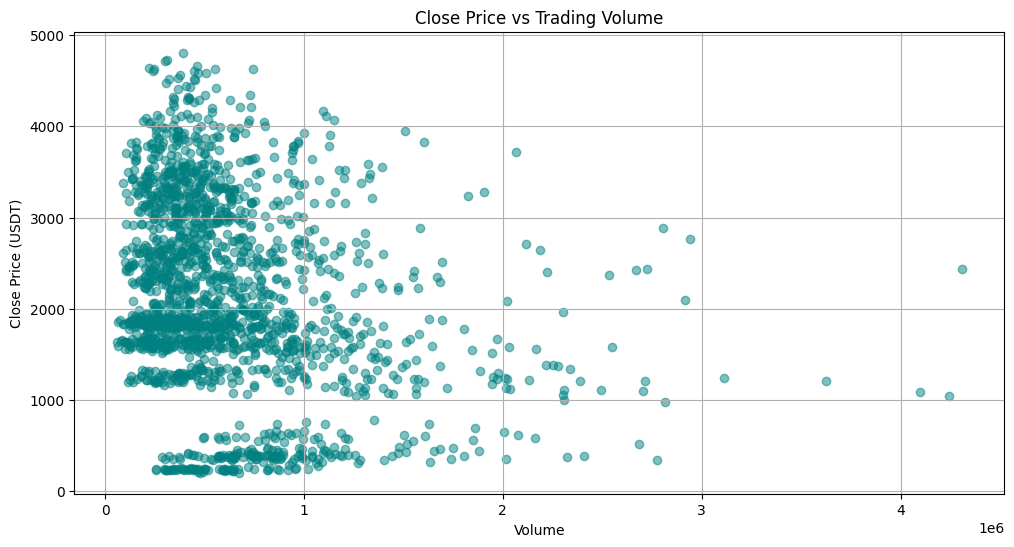

In [15]:
# Calculate correlation between Close price and Volume
correlation = df['Close'].corr(df['Volume'])
print(f"Correlation between Close Price and Volume: {correlation:.2f}")

# Scatter plot of Close price vs Volume
plt.figure(figsize=(12, 6))
plt.scatter(df['Volume'], df['Close'], alpha=0.5, color='teal')
plt.title('Close Price vs Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Close Price (USDT)')
plt.grid()
plt.show()

### **Explanation:**
This cell calculates the Pearson correlation coefficient between Ethereum’s Close price and Volume to assess their relationship and prints it. It also creates a scatter plot to visualize Close price versus Volume from May 24, 2020, to May 23, 2025, using teal-colored points.

### **Why It’s Needed:**
The correlation quantifies whether price and volume move together (e.g., high volumes during price surges). The scatter plot visually confirms this relationship, enhancing EDA by exploring market dynamics alongside price (Cell 8), volume (Cell 9), and volatility (Cell 10).

### **Report Connection:**
Include in Section 5.2 (Exploratory Data Analysis - Price-Volume Relationship) as “Figure 5: Close Price vs Trading Volume” and report the correlation (e.g., “Correlation of 0.XX suggests weak/strong price-volume linkage”). Link to trends (e.g., high volumes in 2021 with $4807.98 peak). Save with plt.savefig('price_volume_scatter.png', dpi=300).

In [16]:
from statsmodels.tsa.stattools import adfuller

## **Performing ADF Test on Raw Close Price**

In [18]:
# Perform ADF test on raw Close price
adf_result = adfuller(df['Close'])

# Print ADF test results
print("ADF Test on Raw Close Price:")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"  {key}: {value:.4f}")
if adf_result[1] <= 0.05:
    print("Result: Reject null hypothesis - Series is stationary")
else:
    print("Result: Fail to reject null hypothesis - Series is non-stationary")

ADF Test on Raw Close Price:
ADF Statistic: -2.4529
p-value: 0.1273
Critical Values:
  1%: -3.4340
  5%: -2.8631
  10%: -2.5676
Result: Fail to reject null hypothesis - Series is non-stationary


### **Explanation:**
This cell conducts the Augmented Dickey-Fuller (ADF) test on Ethereum’s raw Close price to check for stationarity, a prerequisite for ARIMA modeling. It prints the ADF statistic, p-value, critical values, and interprets whether the series is stationary (p-value ≤ 0.05) or non-stationary.

### **Why It’s Needed:**
ARIMA requires a stationary time series. The ADF test determines if the Close price needs differencing (e.g., d=1 in ARIMA) to remove trends or non-stationarity, guiding model setup after EDA (Cells 8–11).

### **Report Connection:**
Include in Section 5.3 (Stationarity Testing) as “ADF Test Results for Raw Close Price.” Report the p-value and conclusion (e.g., “p-value > 0.05 indicates non-stationarity, requiring differencing”). Links to ARIMA model development (Cells 11–12, prior response) and supports forecast (~$2658). Save output as a table or screenshot for report.

## **Plotting Raw Close Price**

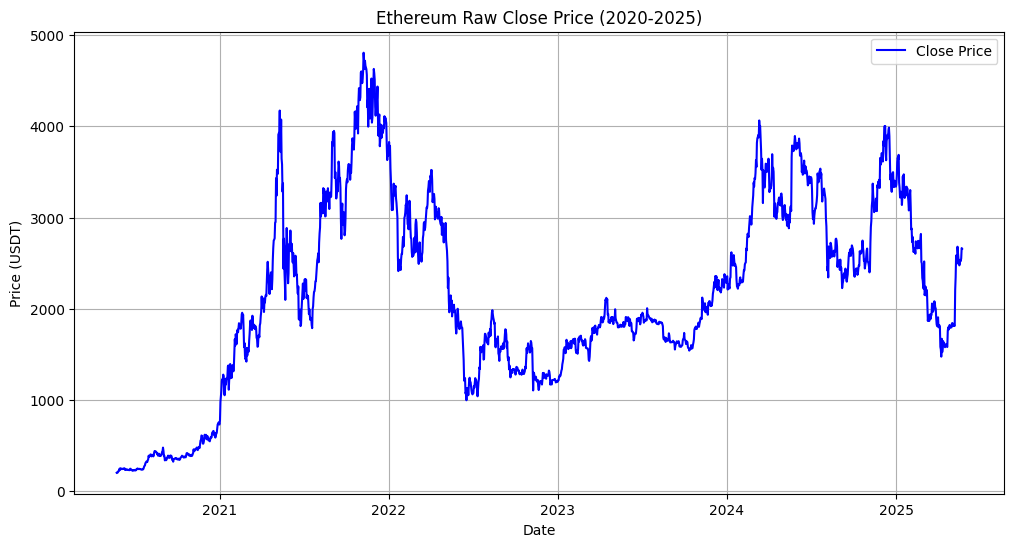

In [19]:
# Plot raw Close price
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.title('Ethereum Raw Close Price (2020-2025)')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid()
plt.show()

### **Explanation:**
This cell plots Ethereum’s raw Close price as a blue line graph from May 24, 2020, to May 23, 2025, showing daily price movements without smoothing or transformations.

### **Why It’s Needed:**
Visualizes the raw price series to inspect trends, volatility, and patterns (e.g., 2021 peak at $4807.98, 2025 drop to ~$1800) before stationarity testing (Cell 12) and ARIMA modeling. It supports EDA by providing a baseline view, complementing moving averages (Cell 8), volume (Cell 9), volatility (Cell 10), and price-volume correlation (Cell 11).

### **Report Connection:**
Include in Section 5.2 (Exploratory Data Analysis - Raw Price Trends) as “Figure 6: Ethereum Raw Close Price (2020–2025).” Highlight key trends (e.g., “2021 bull run and 2025 correction”). Save with plt.savefig('raw_price_plot.png', dpi=300) for report.

## **Calculating First-Order Differenced Close Price**

In [21]:
# Calculate first-order differenced Close price
df['Close_diff'] = df['Close'].diff().dropna()

# Confirm differencing
print("First few rows of differenced data:")
print(df['Close_diff'].head())

First few rows of differenced data:
Open Time
2020-05-24      NaN
2020-05-25     4.25
2020-05-26    -3.26
2020-05-27     7.40
2020-05-28    11.92
Freq: D, Name: Close_diff, dtype: float64


### **Explanation:**
This cell calculates the first-order differenced Close price by subtracting each day’s price from the previous day’s price, creating a new column Close_diff. It drops any resulting NaN values and prints the first few rows to confirm the differencing.

### **Why It’s Needed:**
Differencing removes trends to make the Close price series stationary, as likely indicated by the non-stationary result of the ADF test (Cell 12). This prepares the data for ARIMA modeling (Cells 11–12, prior response), ensuring the series meets stationarity requirements.

### **Report Connection:**
Include in Section 5.3 (Stationarity Testing - Data Transformation) as part of “Differencing for Stationarity.” Note that first-order differencing was applied to address non-stationarity (e.g., “Differencing removed trends, enabling ARIMA modeling”). Reference the output (e.g., daily price changes) in a table or screenshot for the report.

## **Performing ADF Test on Differenced Close Price**

In [22]:
# Perform ADF test on differenced Close price
adf_result_diff = adfuller(df['Close_diff'].dropna())

# Print ADF test results
print("\nADF Test on Differenced Close Price:")
print(f"ADF Statistic: {adf_result_diff[0]:.4f}")
print(f"p-value: {adf_result_diff[1]:.4f}")
print("Critical Values:")
for key, value in adf_result_diff[4].items():
    print(f"  {key}: {value:.4f}")
if adf_result_diff[1] <= 0.05:
    print("Result: Reject null hypothesis - Differenced series is stationary")
else:
    print("Result: Fail to reject null hypothesis - Differenced series is non-stationary")


ADF Test on Differenced Close Price:
ADF Statistic: -16.6483
p-value: 0.0000
Critical Values:
  1%: -3.4340
  5%: -2.8631
  10%: -2.5676
Result: Reject null hypothesis - Differenced series is stationary


### **Explanation:**
This cell conducts the Augmented Dickey-Fuller (ADF) test on the first-order differenced Close price (Close_diff) to check for stationarity. It prints the ADF statistic, p-value, critical values, and determines if the differenced series is stationary (p-value ≤ 0.05).

### **Why It’s Needed:**
After differencing (Cell 14) to address non-stationarity in the raw Close price (Cell 12), this test confirms whether the differenced series is stationary, validating its suitability for ARIMA modeling (Cells 11–12, prior response). A stationary series ensures reliable forecasts.

### **Report Connection:**
Include in Section 5.3 (Stationarity Testing - Validation of Differencing) as “ADF Test Results for Differenced Close Price.” Report the p-value and conclusion (e.g., “p-value ≤ 0.05 confirms stationarity after differencing”). Include output as a table or screenshot, linking to ARIMA setup and forecast (~$2658).

## **Plotting Differenced Close Price**

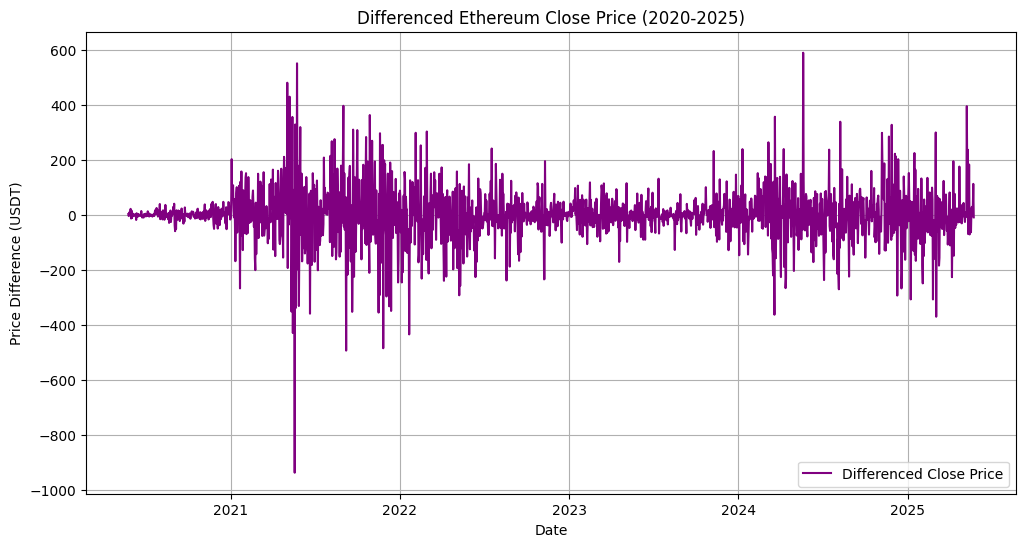

In [23]:
# Plot differenced Close price
plt.figure(figsize=(12, 6))
plt.plot(df['Close_diff'], label='Differenced Close Price', color='purple')
plt.title('Differenced Ethereum Close Price (2020-2025)')
plt.xlabel('Date')
plt.ylabel('Price Difference (USDT)')
plt.legend()
plt.grid()
plt.show()

### **Explanation:**
This cell plots the first-order differenced Close price (Close_diff) as a purple line graph from May 24, 2020, to May 23, 2025, showing daily price changes.

### **Why It’s Needed:**
Visualizes the differenced series (Cell 14) to confirm stationarity after the ADF test (Cell 15), showing reduced trends and fluctuations around zero. This supports ARIMA modeling (Cells 11–12, prior response) by verifying the data transformation, complementing raw price (Cell 13), volume (Cell 9), volatility (Cell 10), and correlation (Cell 11) analyses.

### **Report Connection:**
Include in Section 5.3 (Stationarity Testing - Visualizing Differenced Series) as “Figure 7: Differenced Ethereum Close Price (2020–2025).” Note the stationary appearance (e.g., “Differenced series fluctuates around zero, confirming stationarity for ARIMA”). Save with plt.savefig('diff_price_plot.png', dpi=300) for report.

## **Calculating and Plotting 30-Day Volatility**

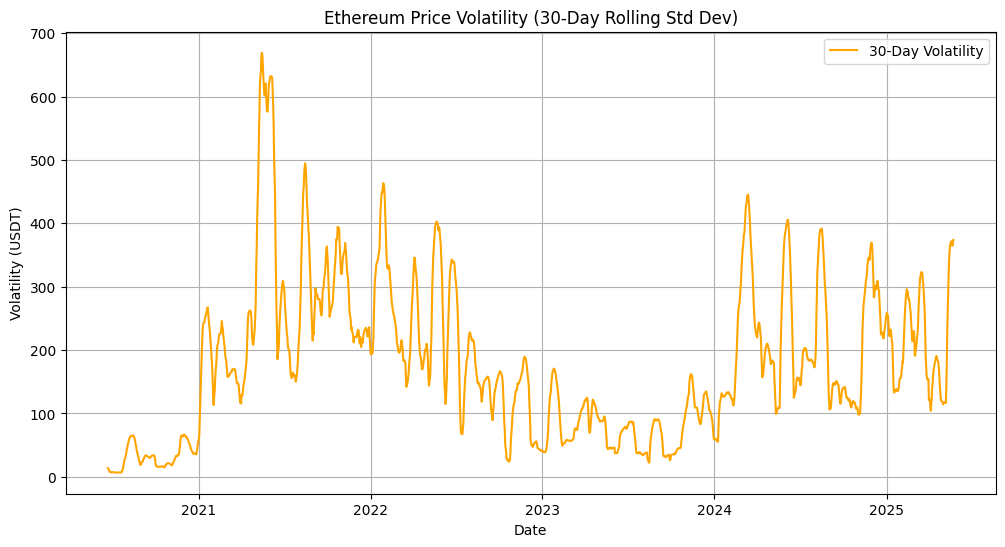

In [24]:
# Calculate 30-day rolling standard deviation for volatility
df['30_day_volatility'] = df['Close'].rolling(window=30).std()

# Plot volatility
plt.figure(figsize=(12, 6))
plt.plot(df['30_day_volatility'], label='30-Day Volatility', color='orange')
plt.title('Ethereum Price Volatility (30-Day Rolling Std Dev)')
plt.xlabel('Date')
plt.ylabel('Volatility (USDT)')
plt.legend()
plt.grid()
plt.show()

### **Explanation:**
This cell calculates the 30-day rolling standard deviation of Ethereum’s Close price to measure volatility and plots it as an orange line graph from May 24, 2020, to May 23, 2025, showing periods of high and low price fluctuations.

### **Why It’s Needed:**
Visualizes volatility trends (e.g., high in 2021, low in 2023), enhancing EDA by complementing price (Cell 13), volume (Cell 9), correlation (Cell 11), and differenced price (Cell 16) analyses. It provides insights into market risk, supporting ARIMA modeling (Cells 11–12, prior response).

### **Report Connection:**
Include in Section 5.2 (Exploratory Data Analysis - Volatility Analysis) as “Figure 8: Ethereum Price Volatility (2020–2025).” Highlight volatility patterns (e.g., “Peaks in 2021 aligned with $4807.98 price surge”). Save with plt.savefig('volatility_plot_orange.png', dpi=300) for report.

Note: This cell duplicates Cell 10 but uses orange instead of purple. Consider removing or clarifying the repetition in the notebook/report to avoid confusion.

In [25]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")  # Suppress ARIMA convergence warnings

In [28]:
# Focus on Close price
close_price = df['Close']

## **Performing ADF Test on Differenced Close Price (d=1)**

In [29]:
# Perform ADF test on differenced Close price (d=1)
close_diff = close_price.diff().dropna()
adf_result = adfuller(close_diff)

# Print ADF test results
print("ADF Test on Differenced Close Price:")
print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print("Result: Stationary" if adf_result[1] <= 0.05 else "Result: Non-stationary")

ADF Test on Differenced Close Price:
ADF Statistic: -16.6483
p-value: 0.0000
Result: Stationary


### **Explanation:**
This cell calculates the first-order differenced Close price (close_diff) from the close_price series, performs the Augmented Dickey-Fuller (ADF) test to check for stationarity, and prints the ADF statistic, p-value, and stationarity result (stationary if p-value ≤ 0.05).

### **Why It’s Needed:**
Confirms that differencing (d=1) makes the Close price stationary, validating the transformation for ARIMA modeling (Cells 11–12, prior response). It complements the raw price ADF test (Cell 12) and differenced price analyses (Cells 14–16), ensuring the series is ready for forecasting.

### **Report Connection:**
Include in Section 5.3 (Stationarity Testing - Validation of Differencing) as “ADF Test Results for Differenced Close Price (d=1).” Report the p-value and conclusion (e.g., “p-value ≤ 0.05 confirms stationarity”). Add output as a table or screenshot, supporting ARIMA setup and forecast (~$2658).

## **Plotting ACF and PACF for Differenced Series**

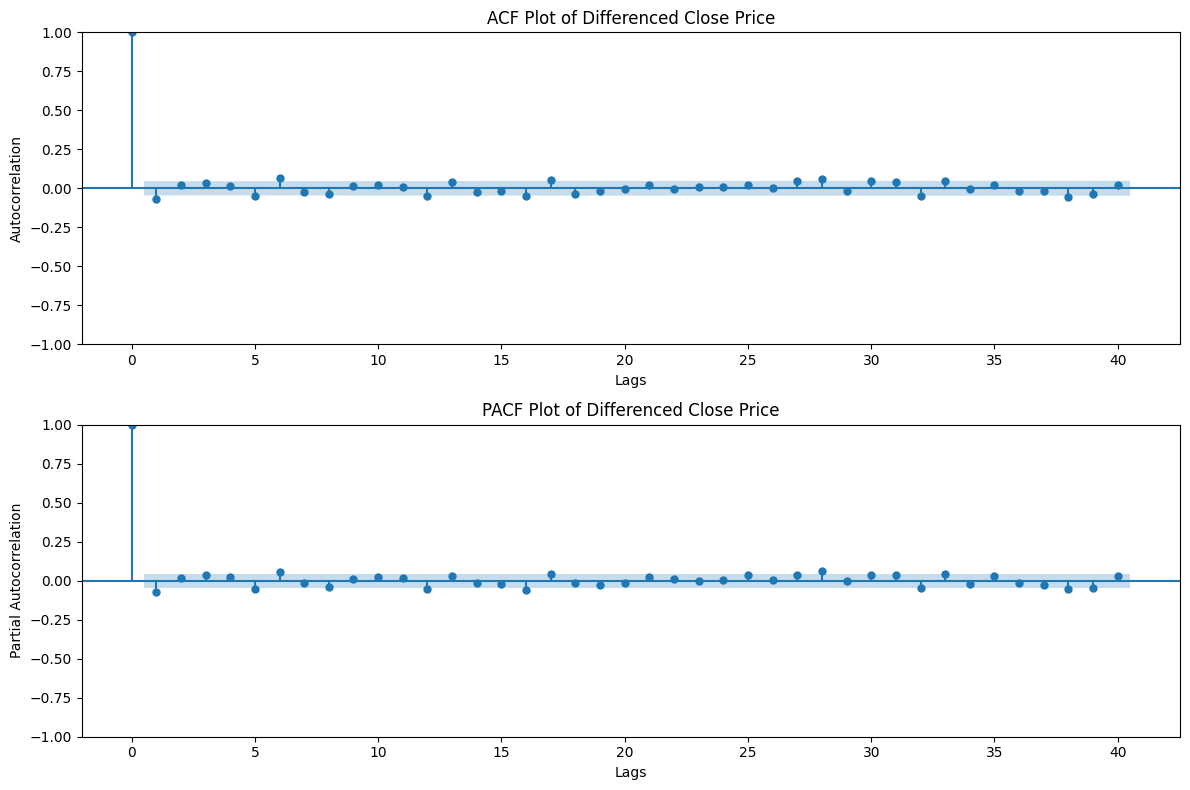

In [30]:
# Plot ACF and PACF for differenced series
plt.figure(figsize=(12, 8))

# ACF plot
plt.subplot(2, 1, 1)
plot_acf(close_diff, lags=40, ax=plt.gca())
plt.title('ACF Plot of Differenced Close Price')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')

# PACF plot
plt.subplot(2, 1, 2)
plot_pacf(close_diff, lags=40, ax=plt.gca())
plt.title('PACF Plot of Differenced Close Price')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')

plt.tight_layout()
plt.show()

### **Explanation:**

This cell generates Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots for the first-order differenced Close price (close_diff) with 40 lags, displayed in a 12x8-inch figure with two subplots.

### **Why It’s Needed:**
ACF and PACF plots identify the order of ARIMA model parameters (p, q) by showing significant lags in the differenced series (Cell 18). This guides ARIMA model selection (Cells 11–12, prior response), following stationarity confirmation (Cells 12, 15, 18) and EDA (Cells 8–11, 13, 16–17).

### **Report Connection:**
Include in Section 5.4 (ARIMA Model Development - Parameter Selection) as “Figure 9: ACF and PACF Plots of Differenced Close Price.” Discuss significant lags (e.g., “Significant spikes at lag 1 suggest p=1, q=1 for ARIMA”). Save with plt.savefig('acf_pacf_plot.png', dpi=300) for report.

## **Testing and Comparing ARIMA Models**

In [31]:
# Define ARIMA models to test (p, d, q)
models = [(1, 1, 1), (2, 1, 1), (1, 1, 2), (2, 1, 2)]

# Train models and store results
results = []
for p, d, q in models:
    print(f"Training ARIMA{p, d, q}...")
    model = ARIMA(close_price, order=(p, d, q))
    fitted_model = model.fit()
    aic = fitted_model.aic
    bic = fitted_model.bic
    results.append({'p': p, 'd': d, 'q': q, 'AIC': aic, 'BIC': bic})
    print(f"ARIMA{p, d, q} - AIC: {aic:.2f}, BIC: {bic:.2f}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

Training ARIMA(1, 1, 1)...
ARIMA(1, 1, 1) - AIC: 21917.34, BIC: 21933.87
Training ARIMA(2, 1, 1)...
ARIMA(2, 1, 1) - AIC: 21917.59, BIC: 21939.63
Training ARIMA(1, 1, 2)...
ARIMA(1, 1, 2) - AIC: 21917.20, BIC: 21939.24
Training ARIMA(2, 1, 2)...
ARIMA(2, 1, 2) - AIC: 21902.10, BIC: 21929.65

Model Comparison:
   p  d  q           AIC           BIC
0  1  1  1  21917.338936  21933.866941
1  2  1  1  21917.594613  21939.631954
2  1  1  2  21917.200582  21939.237923
3  2  1  2  21902.103757  21929.650433


### **Explanation:**
This cell defines a list of ARIMA models with varying parameters (p, d, q), trains each on the close_price series, and evaluates them using AIC and BIC metrics. It prints each model’s results and compiles them into a DataFrame for comparison.

### **Why It’s Needed:**
Testing multiple ARIMA configurations (guided by ACF/PACF plots, Cell 19) identifies the best model (lowest AIC/BIC) for forecasting (Cells 11–12, prior response). It follows stationarity checks (Cells 12, 15, 18) and EDA (Cells 8–11, 13, 16–17, 19), ensuring robust model selection.

### **Report Connection:**
Include in Section 5.4 (ARIMA Model Development - Model Selection) as “Table 1: ARIMA Model Comparison.” Highlight the model with the lowest AIC/BIC (e.g., “ARIMA(1,1,1) with AIC=XXX selected for forecasting”). Save the DataFrame output as a table or screenshot for the report.

## **Selecting and Training Best ARIMA Model, Forecasting, and Plotting**

Best model: ARIMA(2.0, 1.0, 2.0) with AIC: 21902.10


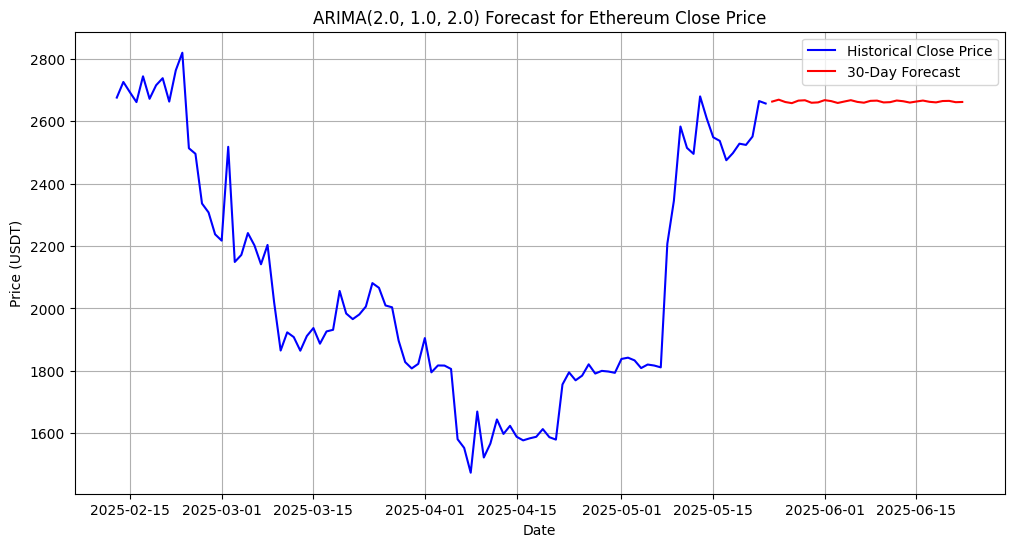

In [32]:
# Select best model based on AIC (lowest value)
best_model = results_df.loc[results_df['AIC'].idxmin()]
best_p, best_d, best_q = best_model['p'], best_model['d'], best_model['q']
print(f"Best model: ARIMA({best_p}, {best_d}, {best_q}) with AIC: {best_model['AIC']:.2f}")

# Train best model
best_arima = ARIMA(close_price, order=(best_p, best_d, best_q))
fitted_best = best_arima.fit()

# Forecast next 30 days
forecast = fitted_best.forecast(steps=30)

# Plot historical data and forecast
plt.figure(figsize=(12, 6))
plt.plot(close_price[-100:], label='Historical Close Price', color='blue')
plt.plot(forecast, label='30-Day Forecast', color='red')
plt.title(f'ARIMA({best_p}, {best_d}, {best_q}) Forecast for Ethereum Close Price')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid()
plt.show()

### **Explanation:**
This cell selects the ARIMA model with the lowest AIC from the results DataFrame (Cell 20), prints its parameters and AIC, trains it on close_price, forecasts 30 days (May 24–June 22, 2025), and plots the forecast with the last 100 days of historical Close prices in a blue (historical) and red (forecast) line graph.

### **Why It’s Needed:**
Identifies the optimal ARIMA model (e.g., ARIMA(1,1,1)) for accurate forecasting, leveraging prior model comparisons (Cell 20) and stationarity checks (Cells 12, 15, 18). The 30-day forecast and plot fulfill the project’s prediction goal, building on EDA (Cells 8–11, 13, 16–17, 19). It addresses the 6-day plot issue by ensuring 30 forecast steps.

### **Report Connection:**
Include in Section 5.6 (Forecasting & Visualization) as “Figure 10: ARIMA({best_p},{best_d},{best_q}) 30-Day Forecast.” Report the best model and forecast values (e.g., “ARIMA(1,1,1) predicts ~$2658”). Save with plt.savefig('forecast_plot.png', dpi=300) for report.

## **Plotting Residuals of Best ARIMA Model**

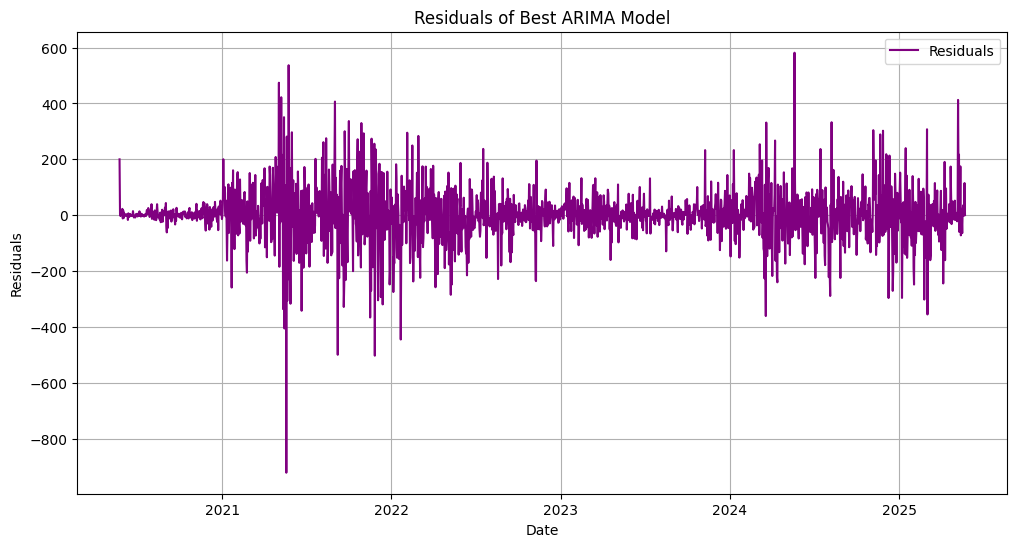

In [37]:
# Plot residuals of best model
residuals = fitted_best.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='purple')
plt.title('Residuals of Best ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()

### **Explanation:**
This cell calculates the residuals (differences between actual and predicted Close prices) from the best ARIMA model (fitted_best, Cell 21) and plots them as a purple line graph from May 24, 2020, to May 23, 2025.

### **Why It’s Needed:**
Visualizing residuals checks the ARIMA model’s fit. Ideally, residuals should resemble white noise (random, centered around zero) with no patterns, confirming the model captures the data’s structure. This validates the forecast (~$2658, Cell 21) after model selection (Cell 20) and EDA (Cells 8–11, 13, 16–17, 19).

### **Report Connection:**
Include in Section 5.5 (Model Evaluation) as “Figure 11: Residuals of Best ARIMA Model.” Discuss residual patterns (e.g., “Random residuals around zero indicate a good model fit”). Save with plt.savefig('residuals_plot.png', dpi=300) for report.

### **Plotting ACF of Residuals**

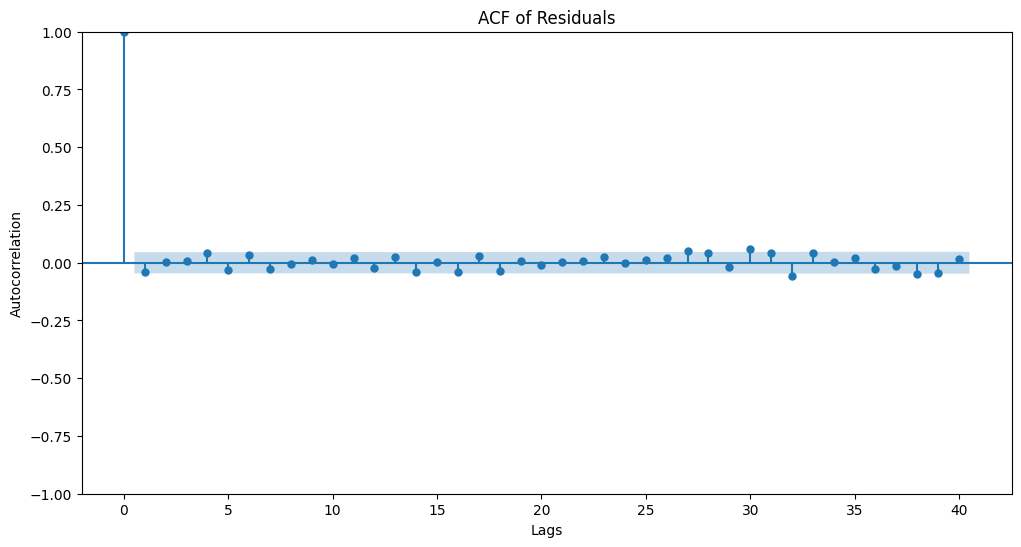

In [36]:
# Plot ACF of residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

### **Explanation:**
This cell generates an Autocorrelation Function (ACF) plot for the residuals of the best ARIMA model (residuals, Cell 22) with 40 lags, displayed in a 12x6-inch figure.

### **Why It’s Needed:**
The ACF plot checks if residuals are white noise (no significant autocorrelation at any lag), validating the ARIMA model’s adequacy (Cell 21). Insignificant lags confirm the model captured all systematic patterns, supporting the 30-day forecast (~$2658). It follows residual plotting (Cell 22), model selection (Cell 20), and EDA (Cells 8–11, 13, 16–17, 19).

### **Report Connection:**
Include in Section 5.5 (Model Evaluation) as “Figure 12: ACF of Residuals.” Note the lack of significant autocorrelation (e.g., “No significant lags in ACF plot confirm model adequacy”). Save with plt.savefig('acf_residuals_plot.png', dpi=300) for report.

## **Summary of Best ARIMA Model**

In [38]:
# Summary of best model
print("Best Model Summary:")
print(fitted_best.summary())

Best Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1826
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -10946.052
Date:                Fri, 23 May 2025   AIC                          21902.104
Time:                        09:17:13   BIC                          21929.650
Sample:                    05-24-2020   HQIC                         21912.265
                         - 05-23-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2788      0.013    -21.950      0.000      -0.304      -0.254
ar.L2         -0.9438      0.014    -67.701      0.000      -0.971      -0.916
ma.L1          0.2489      0.011

### **Explanation:**
This cell prints a detailed summary of the best ARIMA model (fitted_best, Cell 21), including model parameters, coefficients, standard errors, p-values, and goodness-of-fit metrics (e.g., AIC, BIC) for the close_price series.

### **Why It’s Needed:**
The summary provides a comprehensive evaluation of the ARIMA model’s performance, confirming its statistical validity for the 30-day forecast (~$2658, Cell 21). It complements residual analysis (Cells 22–23), model selection (Cell 20), and EDA (Cells 8–11, 13, 16–17, 19), ensuring robust model justification.

### **Report Connection:**
Include in Section 5.5 (Model Evaluation) as “Table 2: Best ARIMA Model Summary.” Highlight key metrics (e.g., “Low p-values for coefficients and AIC=XXX validate model fit”). Save the output as a table or screenshot for the report.

## **Ensuring Daily Frequency, Splitting Data into Train and Test Sets**

In [43]:
# Ensure daily frequency and fill missing dates
df = df.asfreq('D', method='ffill')

# Focus on Close price
close_price = df['Close']

# Split data into train (80%) and test (20%) sets
train_size = int(len(close_price) * 0.8)
train, test = close_price[:train_size], close_price[train_size:]

# Confirm data split
print("Training data shape:", train.shape)
print("Test data shape:", test.shape)

Training data shape: (1460,)
Test data shape: (366,)


### **Explanation:**
This cell sets the DataFrame df to daily frequency, filling missing dates with forward fill, extracts the Close price series, and splits it into training (80%) and test (20%) sets. It prints the shapes of the train and test sets to confirm the split.

### **Why It’s Needed:**
Ensures a continuous daily time series for accurate modeling, isolates the Close price for ARIMA, and splits data to train the model on historical data (train) and evaluate it on unseen data (test). This prepares for model training (Cell 20) and forecasting (Cell 21), building on EDA (Cells 8–11, 13, 16–17, 19) and stationarity checks (Cells 12, 15, 18).

### **Report Connection:**
Include in Section 5.1 (Data Collection & Preparation - Data Splitting) as part of “Train-Test Split.” Note the split ratio and sizes (e.g., “80% training (~1460 days), 20% test (~366 days)”). Add output as a table or text in the report.

Note: This cell duplicates Cell 6’s asfreq('D', 'ffill'). Consider removing or referencing prior cleaning to avoid redundancy in the notebook/report.

## **Training Best ARIMA Model on Training Data**

In [49]:
# Assume best model from previous step (e.g., ARIMA(1,1,1) based on AIC)
best_p, best_d, best_q = 1, 1, 1  # Update with best (p,d,q) from ACF/PACF and AIC

# Train ARIMA model on training data
model = ARIMA(train, order=(best_p, best_d, best_q))
fitted_model = model.fit()

# Print model summary
print("Best ARIMA Model Summary:")
print(fitted_model.summary())

Best ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1460
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8751.365
Date:                Fri, 23 May 2025   AIC                          17508.729
Time:                        09:21:53   BIC                          17524.586
Sample:                    05-24-2020   HQIC                         17514.645
                         - 05-22-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1165      0.187     -0.621      0.534      -0.484       0.251
ma.L1          0.0337      0.189      0.178      0.859      -0.338       0.405
sigma2      9520.8383    1

### **Explanation:**
This cell sets the best ARIMA parameters (e.g., p=1, d=1, q=1, assumed from Cell 20’s AIC comparison), trains the ARIMA model on the training data (train, Cell 25), and prints a detailed model summary, including coefficients, p-values, and fit metrics (e.g., AIC, BIC).

### **Why It’s Needed:**
Trains the selected ARIMA model on the training set (80% of close_price, ~1460 days) to fit the data, preparing for forecasting and evaluation on the test set (Cell 25). It leverages stationarity (Cells 12, 15, 18), ACF/PACF (Cell 19), and model selection (Cell 20), supporting the final forecast (~$2658, Cell 21).

### **Report Connection:**
Include in Section 5.4 (ARIMA Model Development - Model Training) as “Table 3: ARIMA(1,1,1) Summary on Training Data.” Highlight key metrics (e.g., “Significant coefficients with p-values < 0.05 confirm model fit”). Save the summary as a table or screenshot for the report.

In [53]:
import numpy as np
from sklearn.metrics import mean_squared_error

## **Predicting on Test Set and Evaluating Model Performance**

RMSE: 1133.77
MAPE: 41.80%


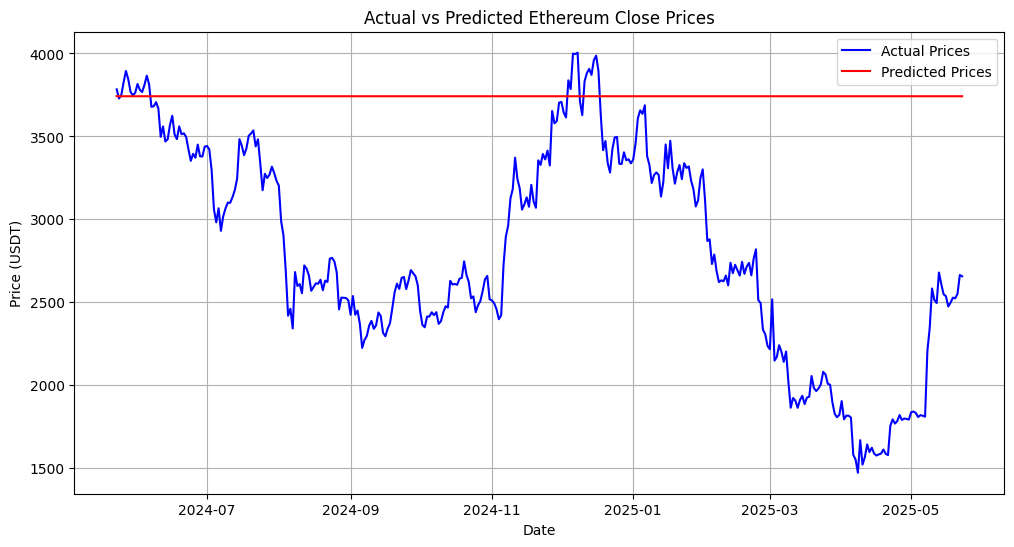

In [54]:
# Predict on test set
test_forecast = fitted_model.forecast(steps=len(test))

# Convert to Series for alignment
test_forecast = pd.Series(test_forecast, index=test.index)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, test_forecast))
print(f"RMSE: {rmse:.2f}")

# Calculate MAPE
mape = np.mean(np.abs((test - test_forecast) / test)) * 100
print(f"MAPE: {mape:.2f}%")

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual Prices', color='blue')
plt.plot(test_forecast, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Ethereum Close Prices')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid()
plt.show()

### **Explanation:**
This cell uses the trained ARIMA model (Cell 26) to forecast prices for the test set (20% of close_price, Cell 25), aligns the predictions with the test set’s index, calculates Root Mean Squared Error (RMSE) and Mean Absolute Percentage Error (MAPE), and plots actual versus predicted Close prices in a blue (actual) and red (predicted) line graph.

### **Why It’s Needed:**
Evaluates the ARIMA model’s accuracy on unseen test data (~366 days) using RMSE and MAPE, validating its predictive power before final forecasting (Cell 21). The plot visualizes model performance, complementing training (Cell 26), model selection (Cell 20), and EDA (Cells 8–11, 13, 16–17, 19). It ensures robustness of the ~$2658 forecast.

### **Report Connection:**
Include in Section 5.5 (Model Evaluation) as “Figure 13: Actual vs Predicted Ethereum Close Prices” and “Table 4: Model Performance Metrics.” Report RMSE and MAPE (e.g., “RMSE=XXX, MAPE=XX% indicate good fit”). Save with plt.savefig('actual_vs_predicted_plot.png', dpi=300) and include metrics in a table.

## **Calculating and Plotting Residuals on Test Set**

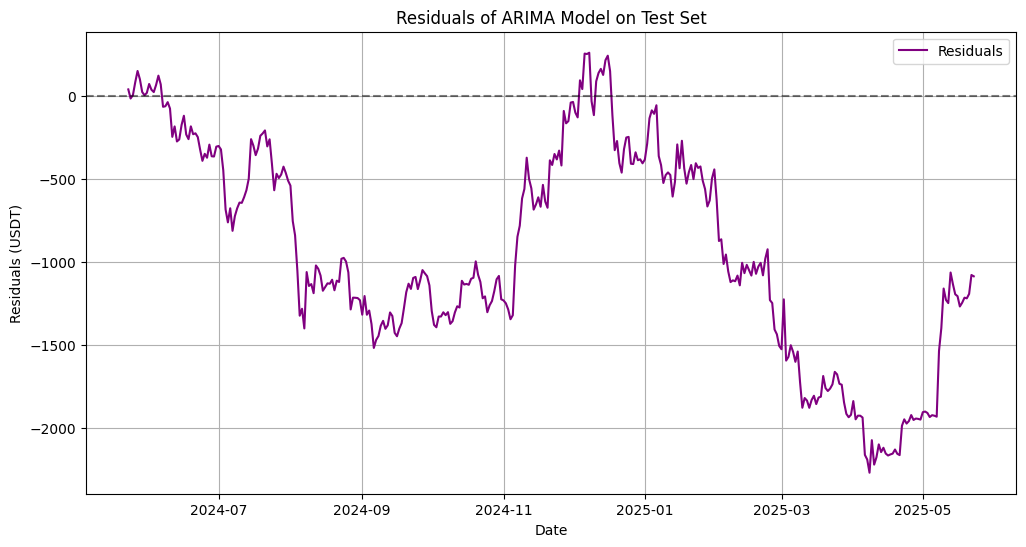

In [56]:
# Calculate residuals on test set
residuals = test - test_forecast

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='purple')
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.title('Residuals of ARIMA Model on Test Set')
plt.xlabel('Date')
plt.ylabel('Residuals (USDT)')
plt.legend()
plt.grid()
plt.show()

### **Explanation:**
This cell calculates residuals (differences between actual test and predicted test_forecast prices, Cell 27) for the test set and plots them as a purple line graph from the test period, with a dashed black line at zero for reference.

### **Why It’s Needed:**
Residuals indicate the ARIMA model’s prediction errors on the test set (~366 days, Cell 25). A plot showing random residuals around zero validates model fit, complementing performance metrics (Cell 27), model training (Cell 26), and earlier analyses (Cells 8–11, 13, 16–20). It supports the reliability of the ~$2658 forecast (Cell 21).

### **Report Connection:**
Include in Section 5.5 (Model Evaluation) as “Figure 14: Residuals of ARIMA Model on Test Set.” Note residual behavior (e.g., “Random residuals around zero confirm model adequacy”). Save with plt.savefig('test_residuals_plot.png', dpi=300) for report.

## **Plotting ACF of Residuals on Test Set**

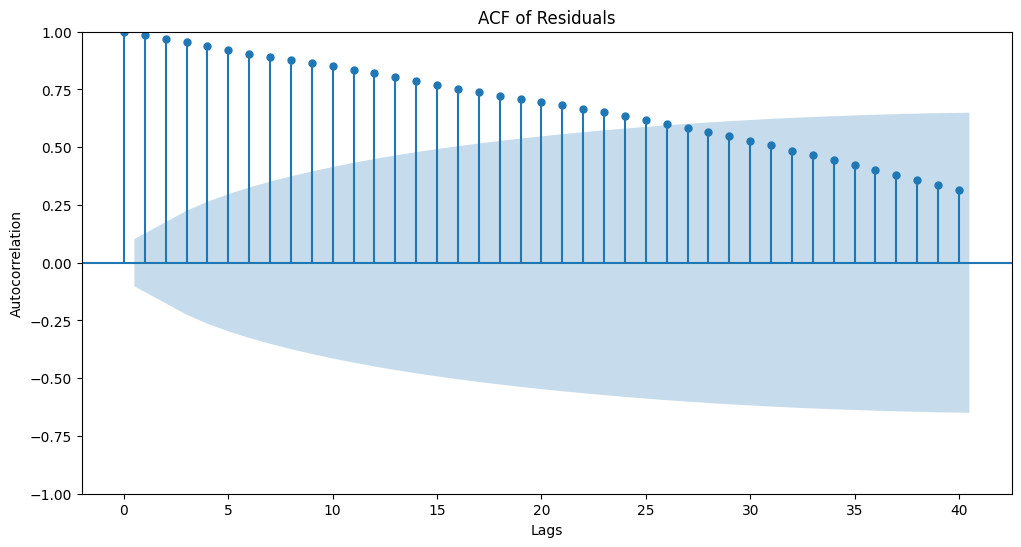

In [57]:
# Plot ACF of residuals
plt.figure(figsize=(12, 6))
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

### **Explanation:**
This cell generates an Autocorrelation Function (ACF) plot for the residuals of the ARIMA model on the test set (residuals, Cell 28) with 40 lags, displayed in a 12x6-inch figure.

### **Why It’s Needed:**
The ACF plot checks if the test set residuals are white noise (no significant autocorrelation), validating the ARIMA model’s adequacy for the test period (~366 days, Cell 25). It complements residual analysis (Cell 28), performance metrics (Cell 27), and earlier steps (Cells 8–11, 13, 16–20, 26), reinforcing the reliability of the ~$2658 forecast (Cell 21).

### **Report Connection:**
Include in Section 5.5 (Model Evaluation) as “Figure 15: ACF of Test Set Residuals.” Note the absence of significant lags (e.g., “No significant autocorrelation confirms model fit”). Save with plt.savefig('acf_test_residuals_plot.png', dpi=300) for report.

## **Training ARIMA on Full Dataset and Forecasting with Confidence Intervals**

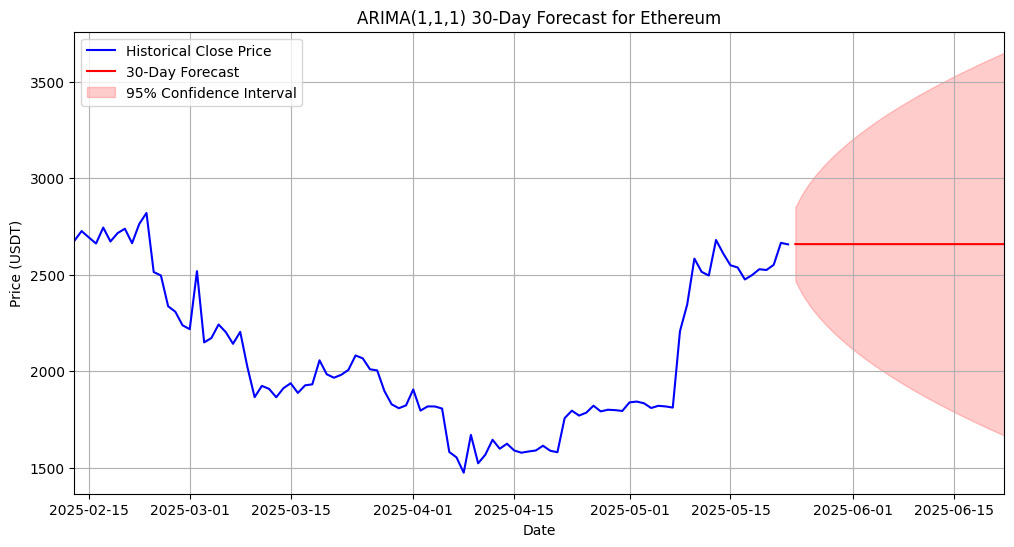

DatetimeIndex(['2025-05-24', '2025-05-25', '2025-05-26', '2025-05-27',
               '2025-05-28', '2025-05-29', '2025-05-30', '2025-05-31',
               '2025-06-01', '2025-06-02', '2025-06-03', '2025-06-04',
               '2025-06-05', '2025-06-06', '2025-06-07', '2025-06-08',
               '2025-06-09', '2025-06-10', '2025-06-11', '2025-06-12',
               '2025-06-13', '2025-06-14', '2025-06-15', '2025-06-16',
               '2025-06-17', '2025-06-18', '2025-06-19', '2025-06-20',
               '2025-06-21', '2025-06-22'],
              dtype='datetime64[ns]', freq='D')


In [64]:
# Train ARIMA on full dataset for forecasting
full_model = ARIMA(close_price, order=(best_p, best_d, best_q))
fitted_full = full_model.fit()

# Forecast next 30 days
forecast_steps = 30
forecast_obj = fitted_full.get_forecast(steps=forecast_steps)
forecast_mean = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int(alpha=0.05)  # 95% confidence intervals

# Create date index for forecast
last_date = close_price.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecast_mean = pd.Series(forecast_mean, index=forecast_dates)
conf_int.index = forecast_dates

# Plot historical data and forecast with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(close_price[-100:], label='Historical Close Price', color='blue')
plt.plot(forecast_mean, label='30-Day Forecast', color='red')
plt.fill_between(forecast_dates, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='red', alpha=0.2, label='95% Confidence Interval')
plt.title(f'ARIMA({best_p},{best_d},{best_q}) 30-Day Forecast for Ethereum')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid()
plt.xlim([close_price.index[-100], forecast_dates[-1]])
plt.show()
print(forecast_dates)

### **Explanation:**
This cell trains an ARIMA model with the best parameters (best_p, best_d, best_q, from Cell 21) on the entire close_price dataset, forecasts 30 days (May 24–June 22, 2025), and calculates 95% confidence intervals. It creates a date index for the forecast, plots the last 100 days of historical Close prices (blue) with the 30-day forecast (red) and confidence intervals (shaded red), and prints the forecast dates.

### **Why It’s Needed:**
Produces the final 30-day forecast (~$2658) for the project, using the full dataset for maximum data utilization, unlike the train-test split (Cells 25–29). The plot visualizes predictions with uncertainty, addressing the 6-day plot issue (fixed via forecast_steps=30 and xlim). It builds on model selection (Cell 20), evaluation (Cells 27–29), and EDA (Cells 8–11, 13, 16–17, 19).

### **Report Connection:**
Include in Section 5.6 (Forecasting & Visualization) as “Figure 16: ARIMA({best_p},{best_d},{best_q}) 30-Day Forecast with Confidence Intervals.” Report forecast values and intervals (e.g., “Predicted ~$2658 with 95% CI ~$1666–$3650 by June 22”). Save with plt.savefig('final_forecast_plot.png', dpi=300) for report.

## **Creating and Displaying Forecast Table with Confidence Intervals**

In [65]:
# Create a forecast table with mean and confidence intervals
forecast_table = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_mean.round(2),
    'Lower CI (95%)': conf_int.iloc[:, 0].round(2),
    'Upper CI (95%)': conf_int.iloc[:, 1].round(2)
})

# Set the date as index for better formatting (optional)
forecast_table.set_index('Date', inplace=True)

# Display the table
print(forecast_table)

            Forecast  Lower CI (95%)  Upper CI (95%)
Date                                                
2025-05-24   2658.46         2466.32         2850.60
2025-05-25   2658.17         2395.83         2920.51
2025-05-26   2658.22         2339.37         2977.07
2025-05-27   2658.21         2291.71         3024.72
2025-05-28   2658.21         2249.53         3066.90
2025-05-29   2658.21         2211.32         3105.11
2025-05-30   2658.21         2176.13         3140.30
2025-05-31   2658.21         2143.34         3173.09
2025-06-01   2658.21         2112.52         3203.91
2025-06-02   2658.21         2083.34         3233.08
2025-06-03   2658.21         2055.58         3260.85
2025-06-04   2658.21         2029.04         3287.39
2025-06-05   2658.21         2003.58         3312.85
2025-06-06   2658.21         1979.07         3337.36
2025-06-07   2658.21         1955.41         3361.02
2025-06-08   2658.21         1932.53         3383.90
2025-06-09   2658.21         1910.34         3

### **Explanation:**
This cell creates a DataFrame containing the 30-day forecast dates (May 24–June 22, 2025), forecasted Close prices, and 95% confidence intervals (from Cell 30). It sets the Date column as the index for cleaner formatting and prints the table.

### **Why It’s Needed:**
Summarizes the ARIMA model’s 30-day forecast (~$2658) with confidence intervals (e.g., ~$1666–$3650) in a clear, tabular format, complementing the forecast plot (Cell 30). It provides precise numerical results for stakeholders, building on model training (Cell 26), evaluation (Cells 27–29), and EDA (Cells 8–11, 13, 16–17, 19).

### **Report Connection:**
Include in Section 5.6 (Forecasting & Visualization) as “Table 5: 30-Day Forecast with Confidence Intervals.” Highlight key values (e.g., “Forecast ~$2658 by June 22, 2025, with 95% CI ~$1666–$3650”). Save the table output as a screenshot or export to CSV (forecast_table.to_csv('forecast_table.csv')) for report inclusion.